## Chap 10: Implementing MLP with Keras 

In [5]:
import tensorflow as tf
from tensorflow import keras as kr
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [37]:
fashion_mnist = kr.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()
print("Shape of x_train: ",x_train.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of x_test: ",x_test.shape)
print("Shape of y_test: ",y_test.shape)

Shape of x_train:  (60000, 28, 28)
Shape of y_train:  (60000,)
Shape of x_test:  (10000, 28, 28)
Shape of y_test:  (10000,)


In [13]:
label = {
    0:"T-shirt",
    1:"Trouser",
    2:"Pullover",
    3:"Dress",
    4:"Coat",
    5:"Sandal",
    6:"Shirt",
    7:"Sneaker",
    8:"Bag",
    9:"Ankle Boot"
}

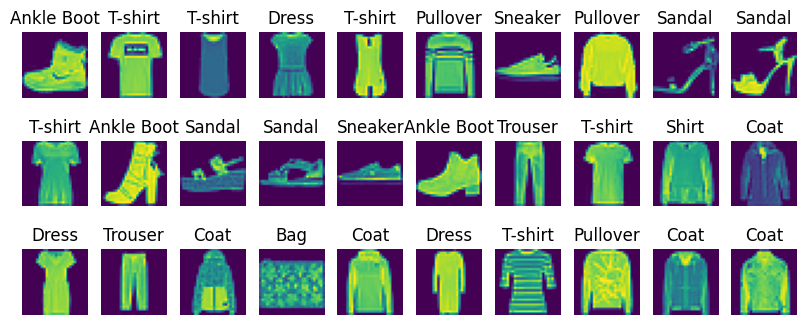

In [15]:
fig = plt.figure(figsize=(10,4))
for i in range(30):
    plt.subplot(3,10,i+1)
    plt.imshow(x_train[i])
    plt.axis(False)
    plt.title(label[y_train[i]])

In [38]:
x_val,x_trainn  = x_train[:5000] /255.0,x_train[5000:]/255.0
y_val,y_trainn = y_train[:5000],y_train[5000:]

#### Sequential API

In [26]:
sequential_model = kr.models.Sequential()
sequential_model.add(kr.layers.Flatten(input_shape=[28,28]))
sequential_model.add(kr.layers.Dense(300,activation='relu'))
sequential_model.add(kr.layers.Dense(100,activation='relu'))
sequential_model.add(kr.layers.Dense(10,activation = 'softmax'))


In [27]:
sequential_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [29]:
sequential_model.compile(loss = "sparse_categorical_crossentropy",
                        optimizer="sgd",
                        metrics=['acc'])

In [30]:
history = sequential_model.fit(x_trainn,y_trainn,epochs = 20,validation_data=(x_val,y_val))

Epoch 1/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.7375 - acc: 0.7600 - val_loss: 0.5428 - val_acc: 0.8060
Epoch 2/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4878 - acc: 0.8294 - val_loss: 0.4549 - val_acc: 0.8392
Epoch 3/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4425 - acc: 0.8439 - val_loss: 0.4062 - val_acc: 0.8602
Epoch 4/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4156 - acc: 0.8553 - val_loss: 0.4092 - val_acc: 0.8576
Epoch 5/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3982 - acc: 0.8587 - val_loss: 0.3813 - val_acc: 0.8658
Epoch 6/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3802 - acc: 0.8665 - val_loss: 0.3691 - val_acc: 0.8712
Epoch 7/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3680 - acc: 0.8702 - val_loss: 0.3652 - val_acc: 0.8704
Epoch 8/20
1719/1719 [==============================] - 6s 4ms

<function matplotlib.pyplot.show(close=None, block=None)>

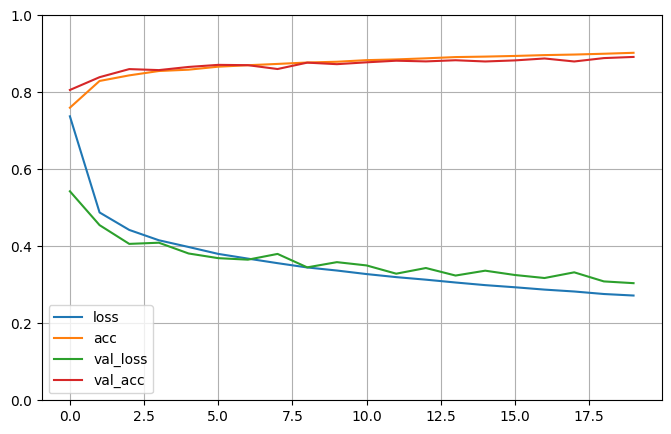

In [31]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid()
plt.gca().set_ylim(0,1)
plt.show

#### trong co ve on? nhung quen ko one-hot encoding

In [39]:
from sklearn.preprocessing import LabelBinarizer

one_hot = LabelBinarizer()
y_train = one_hot.fit_transform(y_trainn)
y_val = one_hot.fit_transform(y_val)

In [44]:
x_trainn.shape,y_train.shape

((55000, 28, 28), (55000, 10))

In [46]:
x_val.shape,y_val.shape

((5000, 28, 28), (5000, 10))

In [48]:
## lưu ý khi đã one_hot thì hàm loss ko được có "sparse"
sequential_model.compile(loss = "categorical_crossentropy",
                        optimizer="sgd",
                        metrics=['acc'])

In [50]:
history1 = sequential_model.fit(x_trainn,y_train,epochs=20,validation_data=(x_val,y_val))

Epoch 1/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1909 - acc: 0.9318 - val_loss: 0.2900 - val_acc: 0.8938
Epoch 2/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1886 - acc: 0.9327 - val_loss: 0.2896 - val_acc: 0.8958
Epoch 3/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1871 - acc: 0.9325 - val_loss: 0.2979 - val_acc: 0.8904
Epoch 4/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1836 - acc: 0.9340 - val_loss: 0.3037 - val_acc: 0.8952
Epoch 5/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1812 - acc: 0.9352 - val_loss: 0.2844 - val_acc: 0.8976
Epoch 6/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1758 - acc: 0.9381 - val_loss: 0.3264 - val_acc: 0.8868
Epoch 7/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1736 - acc: 0.9382 - val_loss: 0.2928 - val_acc: 0.8942
Epoch 8/20
1719/1719 [==============================] - 7s 4ms

<function matplotlib.pyplot.show(close=None, block=None)>

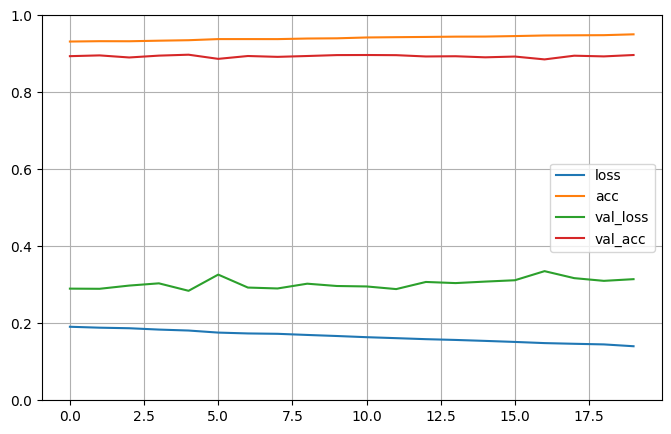

In [51]:
pd.DataFrame(history1.history).plot(figsize=(8,5))
plt.grid()
plt.gca().set_ylim(0,1)
plt.show

#### như này là đ có vấn đề gì đó mà nó ko hội tụ nè

In [55]:
y_test = one_hot.fit_transform(y_test)

In [56]:
sequential_model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 88.2515 - acc: 0.8373


[88.25150299072266, 0.8373000025749207]

### Sequential API for Regression

In [57]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [59]:
houssing = fetch_california_housing()
x_train_full,x_test,y_train_full,y_test = train_test_split(houssing.data,houssing.target)
x_train,x_val,y_train,y_val = train_test_split(x_train_full,y_train_full)

In [60]:
print("Train: ",x_train.shape,y_train.shape)
print("Val: ",x_val.shape,y_val.shape)
print("Test: ",x_test.shape,y_test.shape)

Train:  (11610, 8) (11610,)
Val:  (3870, 8) (3870,)
Test:  (5160, 8) (5160,)


In [61]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.fit_transform(x_val)
x_test = scaler.fit_transform(x_test)

In [64]:
x_train[0]

array([ 1.04367956,  1.85309145, -0.09352067,  0.19751015,  0.02733842,
       -0.13445813,  1.00074732, -1.411477  ])

In [66]:
sequential_model_regression = kr.models.Sequential()
sequential_model_regression.add(kr.layers.Dense(30,activation = 'relu',input_shape=(8,1)))
sequential_model_regression.add(kr.layers.Dense(1))


In [68]:
sequential_model_regression.compile(loss='mse',optimizer='sgd')

In [69]:
history2 = sequential_model_regression.fit(x_train,y_train,epochs=10,validation_data=(x_val,y_val))

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 1.4991 - val_loss: 1.3352
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 1.3596 - val_loss: 1.3334
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 1.3588 - val_loss: 1.3371
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 1.3588 - val_loss: 1.3334
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 1.3588 - val_loss: 1.3331
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 1.3593 - val_loss: 1.3332
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 1.3584 - val_loss: 1.3331
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 1.3584 - val_loss: 1.3345
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 1.3594 - val_loss: 1.3336
Epoch 10/10
363/363 [==============================] - 1s 2ms/step - loss: 1.3586 - val_loss: 1.3329

In [70]:
error_mse = sequential_model_regression.evaluate(x_test,y_test)

162/162 [==============================] - 0s 1ms/step - loss: 1.2742


In [76]:
x_test[0:1]

array([[-0.09514558,  0.50714723,  0.34539894, -0.01916804, -1.06336397,
         0.00344323, -0.76835355,  1.01154011]])

In [81]:
sequential_model_regression.predict(x_test[1:2])

1/1 [==============================] - 0s 23ms/step


array([[[2.0873709],
        [2.0871725],
        [2.0611753],
        [2.0836763],
        [2.061122 ],
        [2.0738864],
        [2.061145 ],
        [2.0825577]]], dtype=float32)

In [80]:
y_test[1]

1.375